In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from psm_utils.io.peptide_record import peprec_to_proforma
from psm_utils.psm import PSM
from psm_utils.psm_list import PSMList
from psm_utils.io import write_file
from deeplc import FeatExtractor


from sklearn.metrics import mean_absolute_error
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import callbacks
from scipy.stats import uniform, randint, pearsonr
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from IPython.display import display
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Dense, Flatten
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam

In [3]:
infile = pd.read_csv("/home/emmy/Notebooks2/output/MQpeprec_1.csv") #hier peprec aanroepen

infile.head()
psm_list = [] #psm_list is type object 
for idx,row in infile.iterrows():
    seq = row["sequence"]
    charge = row["charge"]  # Get the charge from the row
    mod = row["modifications"]
    
    peptidoform = f"{seq}/{charge}"
    psm_list.append(PSM(peptidoform=peprec_to_proforma(peptidoform,mod),spectrum_id=idx))
    
psm_list = PSMList(psm_list=psm_list)

feat_extractor = FeatExtractor()
matrices = feat_extractor.encode_atoms(psm_list, list(range(len(psm_list))), predict_ccs=True)

In [3]:
data = pd.read_csv("/home/emmy/Notebooks2/output/MQpeprec_1.csv") #reading in the data
ccs_df = data[['tr']]
ccs_df = ccs_df.rename(columns={'tr': 'CCS'})
ccs_df.head()

,CCS
0,409.181586
1,675.752631
2,593.085242
3,682.043900
4,492.912110


In [5]:
matrix = np.stack(list(matrices["matrix"].values()))
matrix_all = np.stack(list(matrices["matrix_all"].values()))

In [6]:
# Split the data into training and testing sets
matrix_train, matrix_test, matrix_all_train, matrix_all_test, ccs_train, ccs_test = train_test_split(matrix, matrix_all, ccs_df, test_size=0.2, random_state=42)

In [7]:
# Further split the training data into training and validation sets if needed
matrix_train, matrix_val, matrix_all_train, matrix_all_val, ccs_train, ccs_val = train_test_split(matrix_train, matrix_all_train, ccs_train, test_size=0.1, random_state=42)

In [4]:
%matplotlib inline

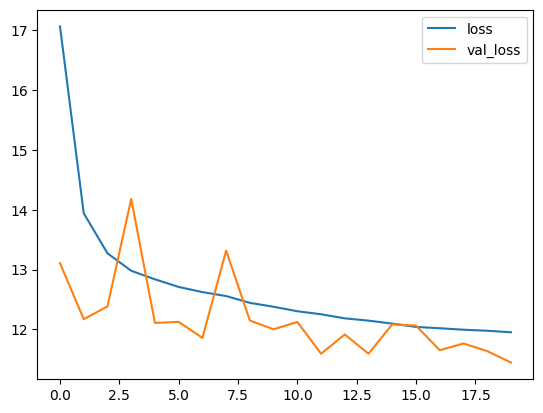

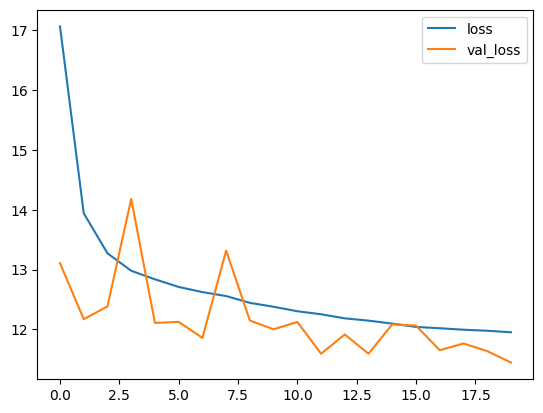

In [7]:
history_df_cnn_mod = pd.read_csv('history_cnn_mod.csv')
history_df_cnn_mod.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


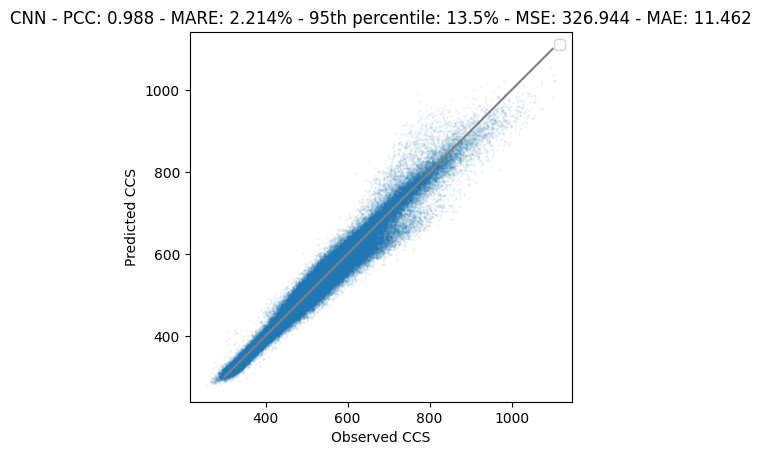

In [5]:
ccs_test_model_cnn_mod = pd.read_csv('/home/emmy/Notebooks2/output_CNN/ccs_test_model_cnn_mod.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_cnn_mod["CCS"],
    ccs_test_model_cnn_mod["Model_cnn_mod_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_cnn_mod["Model_cnn_mod_predictions"]
true_ccs = ccs_test_model_cnn_mod["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"CNN - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

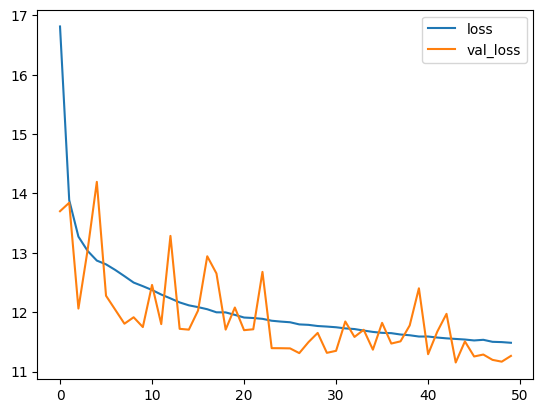

In [9]:
history_df_cnn_mod2 = pd.read_csv('history_cnn_mod2.csv')
history_df_cnn_mod2.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


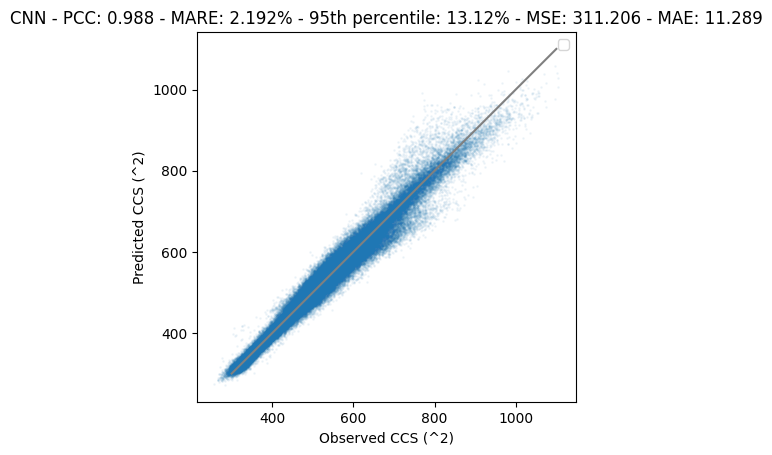

In [6]:
ccs_test_model_cnn_mod2 = pd.read_csv('/home/emmy/Notebooks2/output_CNN/ccs_test_model_cnn_mod2.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_cnn_mod2["CCS"],
    ccs_test_model_cnn_mod2["Model_cnn_mod2_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_cnn_mod2["Model_cnn_mod2_predictions"]
true_ccs = ccs_test_model_cnn_mod2["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"CNN - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS (^2)")
plt.ylabel("Predicted CCS (^2)")

plt.show()

In [4]:
%matplotlib inline

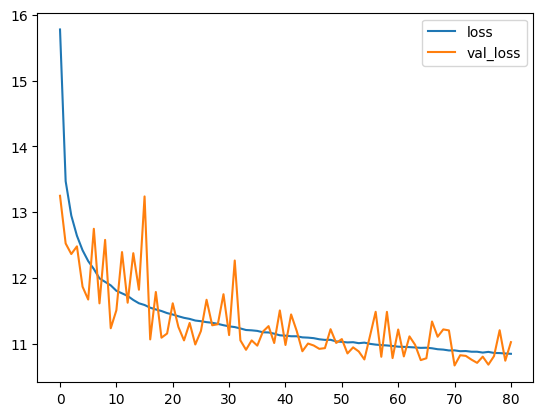

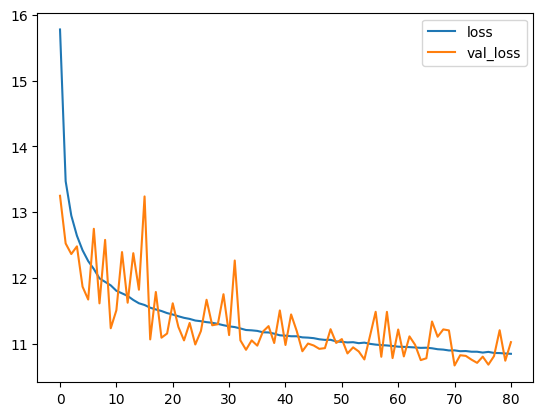

In [5]:
history_df_cnn_mod3 = pd.read_csv('history_cnn_mod3.csv')
history_df_cnn_mod3.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


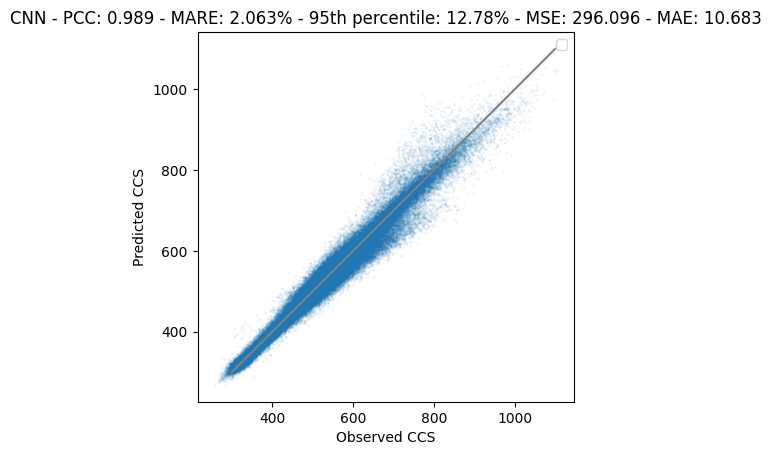

In [7]:
ccs_test_model_cnn_mod3 = pd.read_csv('/home/emmy/Notebooks2/output_CNN/ccs_test_model_cnn_mod3.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_cnn_mod3["CCS"],
    ccs_test_model_cnn_mod3["Model_cnn_mod3_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_cnn_mod3["Model_cnn_mod3_predictions"]
true_ccs = ccs_test_model_cnn_mod3["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"CNN - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

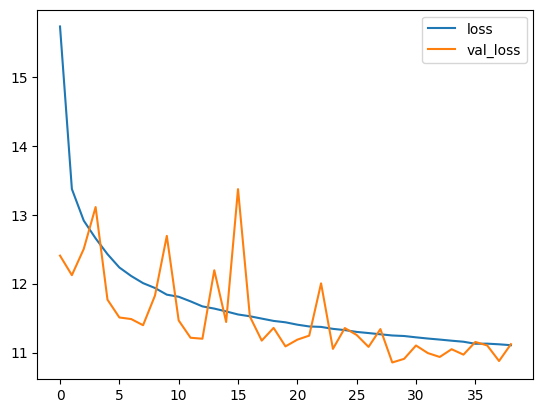

In [4]:
history_df_cnn_mod4 = pd.read_csv('history_cnn_mod4.csv')
history_df_cnn_mod4.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


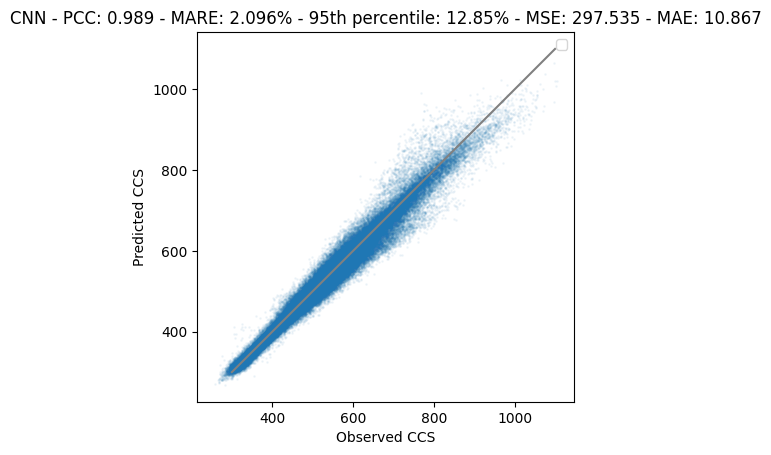

In [8]:
ccs_test_model_cnn_mod4 = pd.read_csv('/home/emmy/Notebooks2/output_CNN/ccs_test_model_cnn_mod4.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_cnn_mod4["CCS"],
    ccs_test_model_cnn_mod4["Model_cnn_mod4_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_cnn_mod4["Model_cnn_mod4_predictions"]
true_ccs = ccs_test_model_cnn_mod4["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"CNN - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

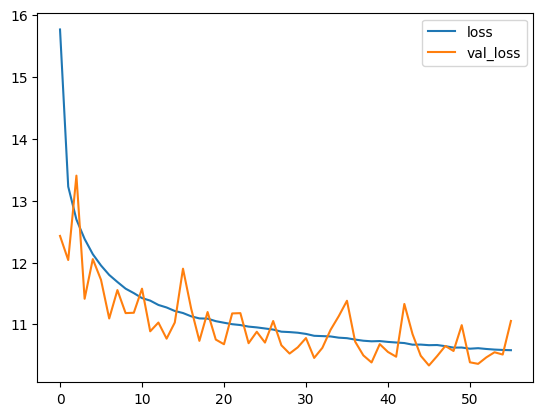

In [4]:
history_df_cnn_mod5 = pd.read_csv('history_cnn_mod5.csv')
history_df_cnn_mod5.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


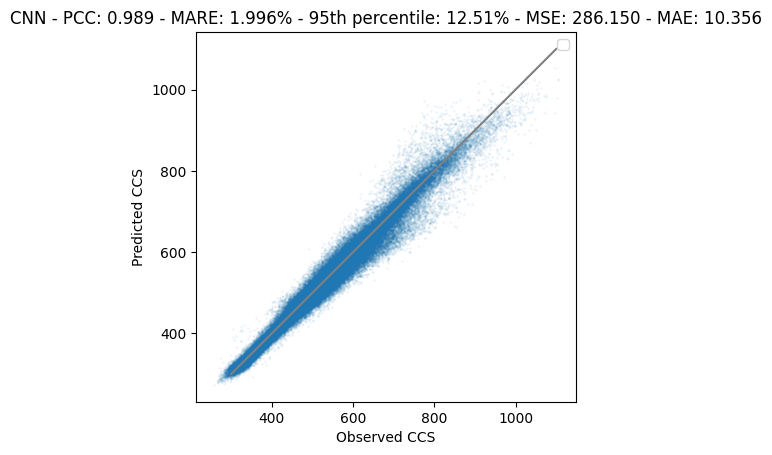

In [10]:
ccs_test_model_cnn_mod5 = pd.read_csv('/home/emmy/Notebooks2/output_CNN/ccs_test_model_cnn_mod5.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_cnn_mod5["CCS"],
    ccs_test_model_cnn_mod5["Model_cnn_mod5_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_cnn_mod5["Model_cnn_mod5_predictions"]
true_ccs = ccs_test_model_cnn_mod5["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"CNN - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

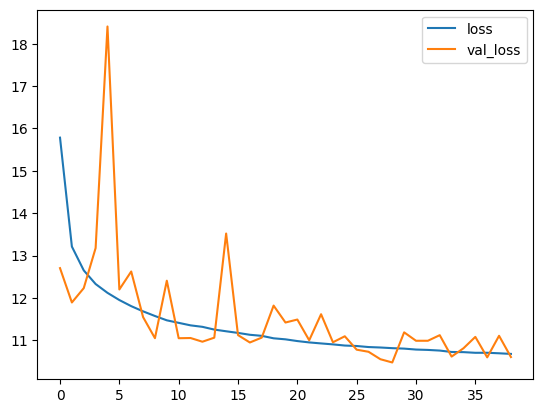

In [5]:
history_df_cnn_mod6 = pd.read_csv('history_cnn_mod6.csv')
history_df_cnn_mod6.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


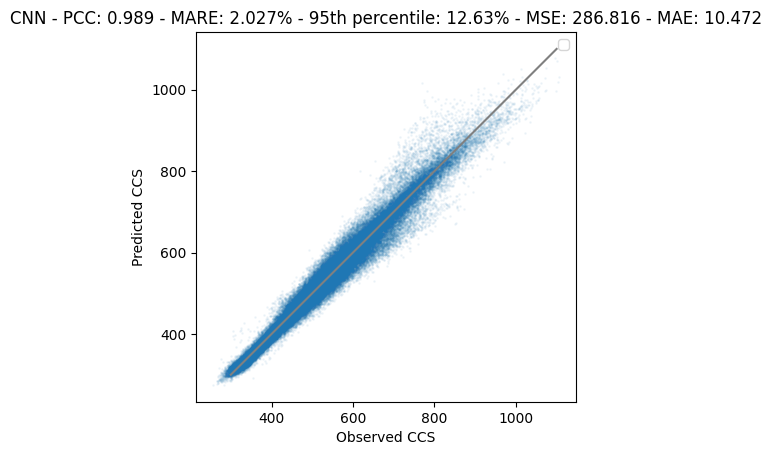

In [11]:
ccs_test_model_cnn_mod6 = pd.read_csv('/home/emmy/Notebooks2/output_CNN/ccs_test_model_cnn_mod6.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_cnn_mod6["CCS"],
    ccs_test_model_cnn_mod6["Model_cnn_mod6_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_cnn_mod6["Model_cnn_mod6_predictions"]
true_ccs = ccs_test_model_cnn_mod6["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"CNN - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


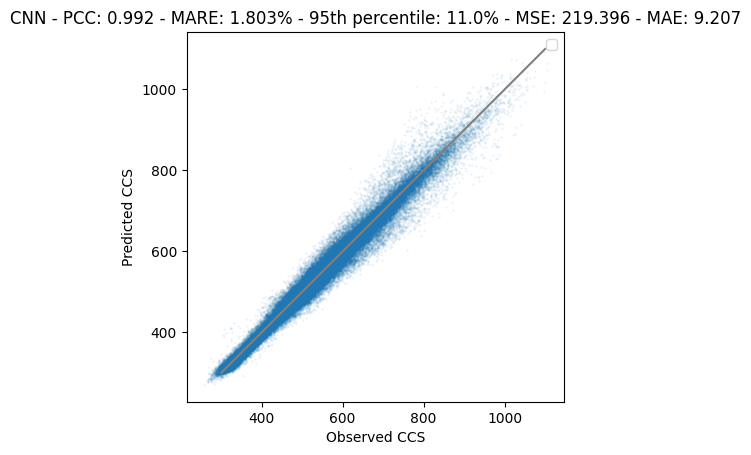

In [13]:
ccs_test_model_cnn_mod7 = pd.read_csv('/home/emmy/Notebooks2/output_CNN/ccs_test_model_cnn_mod7.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_cnn_mod7["CCS"],
    ccs_test_model_cnn_mod7["Model_cnn_mod7_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_cnn_mod7["Model_cnn_mod7_predictions"]
true_ccs = ccs_test_model_cnn_mod7["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"CNN - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()